In [51]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#한글 폰트 설정
plt.rcParams['font.family'] = 'Moneygraphy Rounded' # SejongGeulggot, Moneygraphy Rounded
plt.rcParams['axes.unicode_minus'] = False

In [52]:
from matplotlib import font_manager

# 정확한 폰트 이름 확인
font_list = [f.name for f in font_manager.fontManager.ttflist]
for font in sorted(set(font_list)):
    print(font)

Agency FB
Algerian
Ami R
Arial
Arial Rounded MT Bold
BIZ UDGothic
BIZ UDMincho
Bahnschrift
Baskerville Old Face
Batang
Bauhaus 93
Bell MT
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Book Antiqua
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Brush Script MT
Calibri
Californian FB
Calisto MT
Cambria
Candara
Castellar
Centaur
Century
Century Gothic
Century Schoolbook
Chiller
Colonna MT
Comic Sans MS
Consolas
Constantia
Cooper Black
Copperplate Gothic Bold
Copperplate Gothic Light
Corbel
Courier New
Curlz MT
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Dubai
Ebrima
Edwardian Script ITC
Elephant
Elice DigitalCoding OTF
Elice DigitalCoding ver.H
Engravers MT
Eras Bold ITC
Eras Demi ITC
Eras Light ITC
Eras Medium ITC
FZShuTi
FZYaoTi
Felix Titling
Footlight MT Light
Forte
Franklin Gothic Book
Franklin Gothic Demi
Franklin Gothic Demi Cond
Franklin Gothic Heavy
Franklin Gothic Medium
Frank

## [절대값]

### 1-1 연어_가락 ~ KOSPI 

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 315일 | 0.6868 | 2.3383e-196 |

     타임래그(일)  피어슨 상관계수           P-값
0          1  0.161744  1.565333e-11
1          2  0.162677  1.208991e-11
2          3  0.163319  1.015639e-11
3          4  0.164933  6.400075e-12
4          5  0.166432  4.157351e-12
..       ...       ...           ...
594      595  0.410138  8.490140e-47
595      596  0.409181  1.582695e-46
596      597  0.408416  2.645813e-46
597      598  0.406000  1.090107e-45
598      599  0.403683  4.203011e-45

[599 rows x 3 columns]


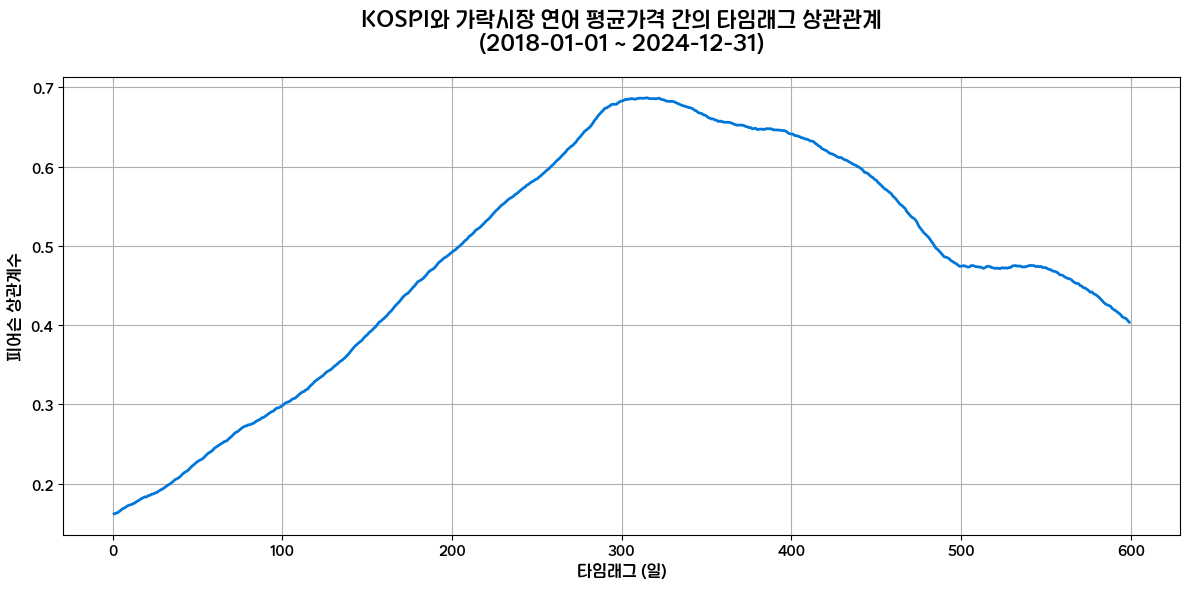

KOSPI와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 315일 입니다.
최대 피어슨 상관계수: 0.6868
P-값: 2.3383e-196


In [53]:
# 경제지표 데이터 로드
df_kospi = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])


# 날짜 범위 지정 
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_kospi, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    kospi_lagged = df_merged['KOSPI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        kospi_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )

# 타이틀 크기 변경
plt.title(f'KOSPI와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )

plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('kospi_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'KOSPI와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-2 연어_가락 ~ USD/KRW

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.8383 |  0.000000e+00 |

     타임래그(일)  피어슨 상관계수           P-값
0          1  0.838294  0.000000e+00
1          2  0.837864  0.000000e+00
2          3  0.837022  0.000000e+00
3          4  0.836314  0.000000e+00
4          5  0.835101  0.000000e+00
..       ...       ...           ...
594      595  0.417022  1.776507e-48
595      596  0.416701  2.347393e-48
596      597  0.420777  2.523971e-49
597      598  0.420423  3.410145e-49
598      599  0.423197  7.619969e-50

[599 rows x 3 columns]


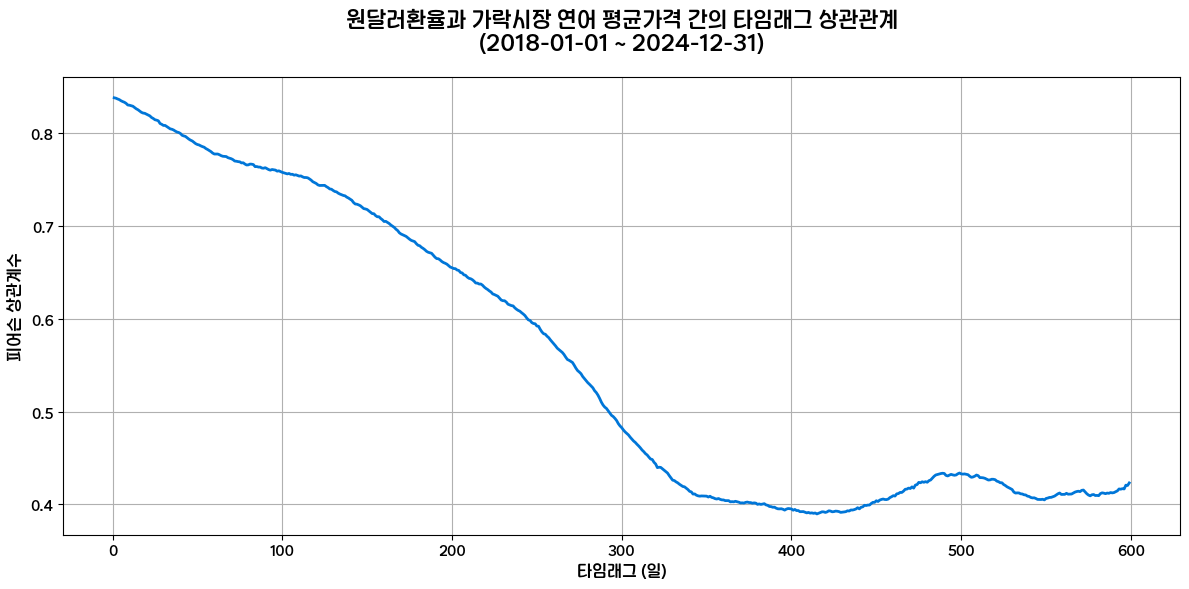

원달러 환율과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.8383
P-값: 0.0000e+00


In [54]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    usdkrw_lagged = df_merged['USD/KRW'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        usdkrw_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'원달러환율과 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('usdkrw_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'원달러 환율과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-3 연어_가락 ~ VIX

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 504일 |  0.5604  |  2.5519e-101 |

      타임래그(일)  피어슨 상관계수       P-값
0           1 -0.085168  0.000411
1           2 -0.082517  0.000623
2           3 -0.081726  0.000705
3           4 -0.080919  0.000799
4           5 -0.078664  0.001120
...       ...       ...       ...
1244     1245 -0.050296  0.274977
1245     1246 -0.060955  0.186167
1246     1247 -0.075278  0.102744
1247     1248 -0.066858  0.147840
1248     1249 -0.061359  0.184665

[1249 rows x 3 columns]


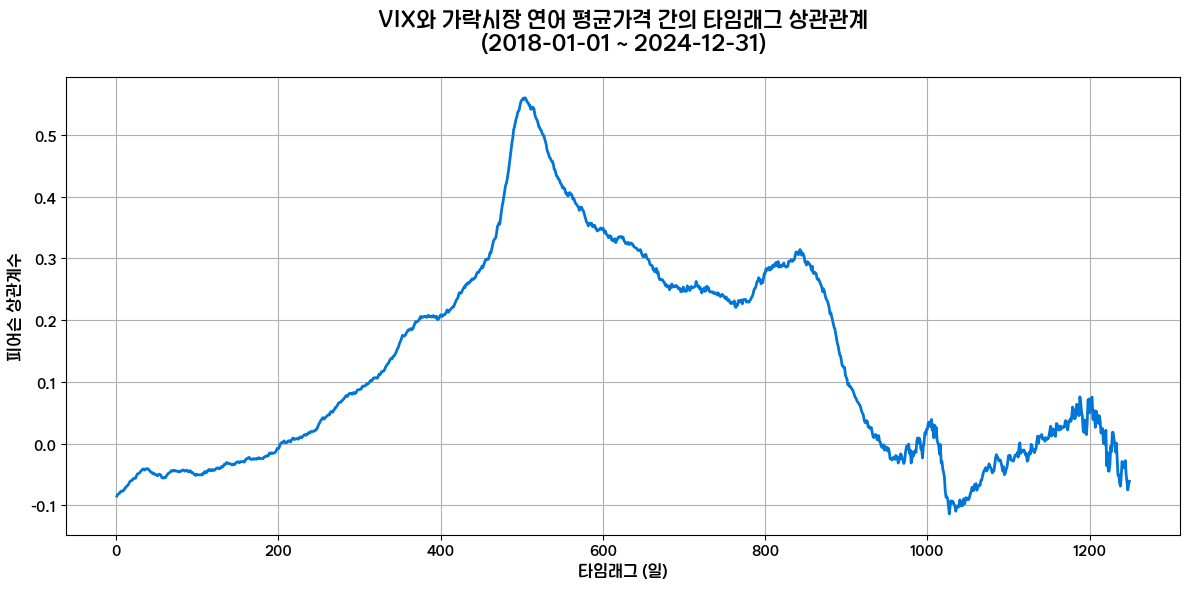

VIX와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 504일 입니다.
최대 피어슨 상관계수: 0.5604
P-값: 2.5519e-101


In [55]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1250)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    vix_lagged = df_merged['VIX'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        vix_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'VIX와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('vix_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'VIX와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-4 연어_가락 ~ WTI

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 112일 |  0.7035  | 3.0350e-242 |

     타임래그(일)  피어슨 상관계수            P-값
0          1  0.663993  8.779379e-219
1          2  0.666146  1.434918e-220
2          3  0.669734  1.155656e-223
3          4  0.671712  2.499376e-225
4          5  0.674002  2.719589e-227
..       ...       ...            ...
594      595  0.026065   3.828624e-01
595      596  0.025364   3.959975e-01
596      597  0.024621   4.102019e-01
597      598  0.021829   4.655133e-01
598      599  0.018426   5.380711e-01

[599 rows x 3 columns]


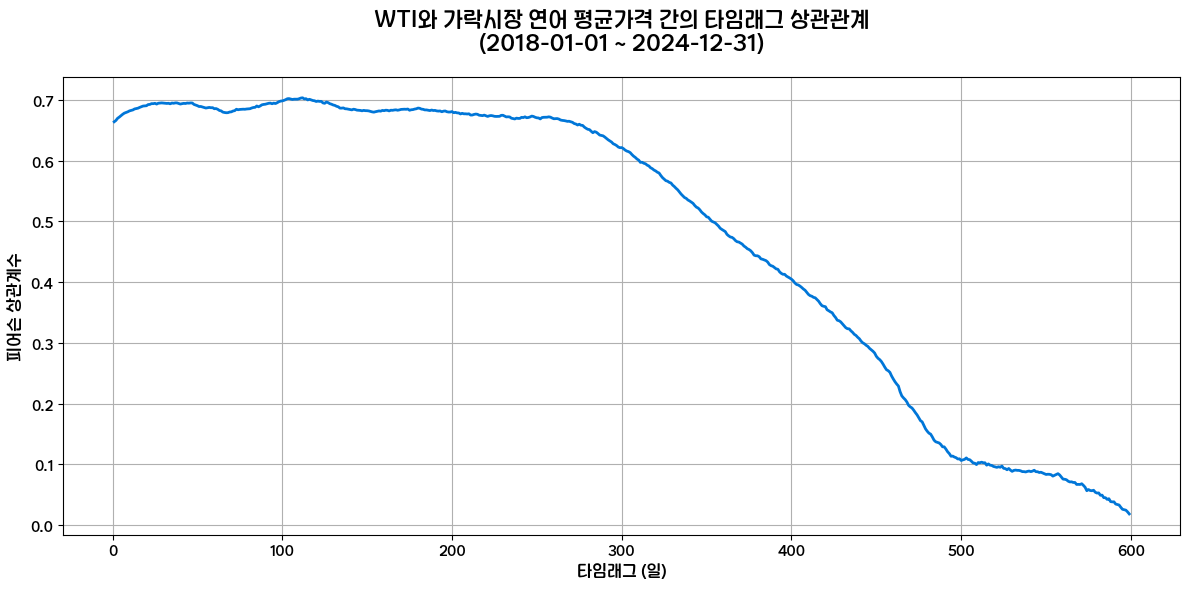

WTI와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 112일 입니다.
최대 피어슨 상관계수: 0.7035
P-값: 3.7096e-240


In [56]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]
# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    wti_lagged = df_merged['WTI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        wti_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'WTI와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('wti_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'WTI와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-5 연어_가락 ~ Gold

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 471일 | 0.8716  | 0.0000e+0 |

      타임래그(일)  피어슨 상관계수            P-값
0           1  0.642298  2.351312e-200
1           2  0.642823  1.144699e-200
2           3  0.643415  4.917401e-201
3           4  0.642982  1.450024e-200
4           5  0.643820  3.911822e-201
...       ...       ...            ...
1594     1595 -0.215336   1.675979e-02
1595     1596 -0.177006   5.112810e-02
1596     1597 -0.202603   2.583635e-02
1597     1598 -0.168128   6.642232e-02
1598     1599 -0.214762   1.900217e-02

[1599 rows x 3 columns]


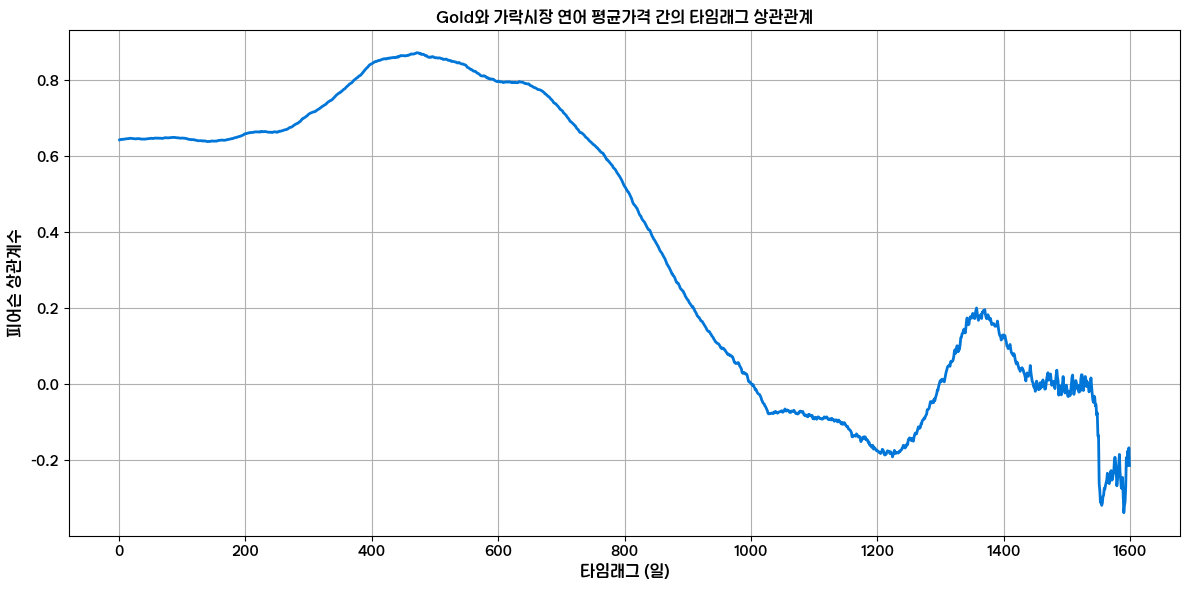

Gold와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 471일 입니다.
최대 피어슨 상관계수: 0.8716
P-값: 0.0000e+00


In [57]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    gold_lagged = df_merged['Gold'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        gold_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'Gold와 가락시장 연어 평균가격 간의 타임래그 상관관계')
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('gold_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'Gold와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-6 연어_가락 ~ Silver

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 397일 | 0.8541  | 0.0000e+0 |


      타임래그(일)  피어슨 상관계수            P-값
0           1  0.494427  1.571993e-106
1           2  0.495723  4.206853e-107
2           3  0.496234  2.719204e-107
3           4  0.495714  5.635159e-107
4           5  0.496600  2.388907e-107
...       ...       ...            ...
1594     1595 -0.050127   5.819048e-01
1595     1596  0.026082   7.755129e-01
1596     1597 -0.039753   6.650746e-01
1597     1598  0.004906   9.575871e-01
1598     1599 -0.105637   2.528729e-01

[1599 rows x 3 columns]


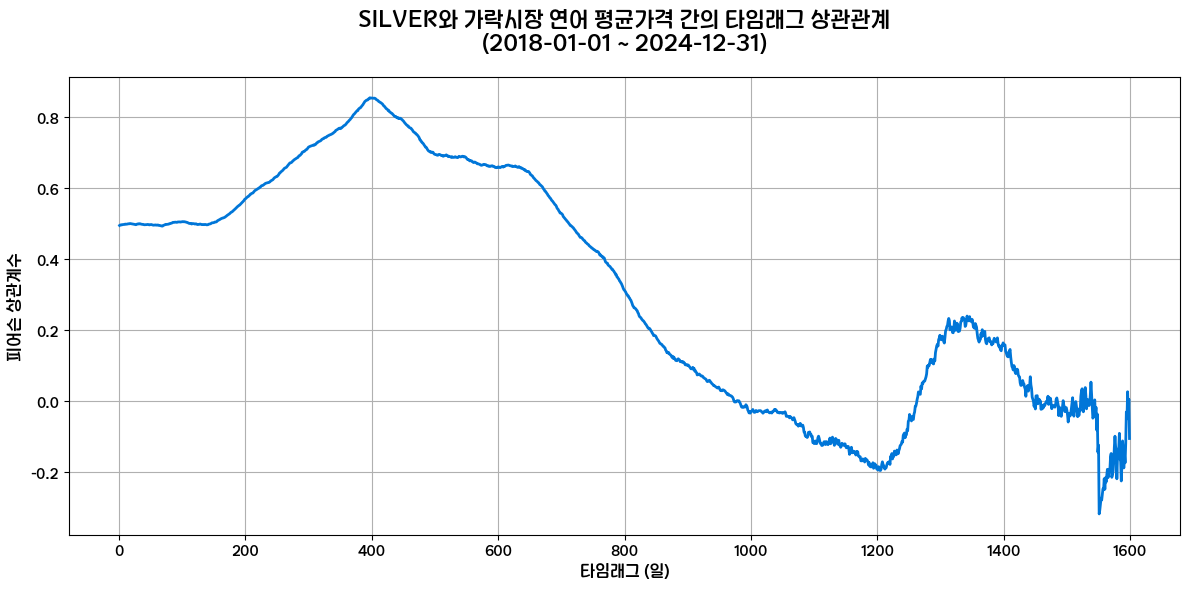

SILVER와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 397일 입니다.
최대 피어슨 상관계수: 0.8541
P-값: 0.0000e+00


In [58]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    silver_lagged = df_merged['Silver'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        silver_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'SILVER와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('silver_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'SILVER와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-7 연어_가락 ~ MOVE

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 4일 | 0.8459  | 0.0000e+0 |


     타임래그(일)  피어슨 상관계수           P-값
0          1  0.843276  0.000000e+00
1          2  0.845038  0.000000e+00
2          3  0.845634  0.000000e+00
3          4  0.845883  0.000000e+00
4          5  0.844260  0.000000e+00
..       ...       ...           ...
594      595  0.258674  1.260866e-18
595      596  0.256218  2.813385e-18
596      597  0.258610  1.379532e-18
597      598  0.262827  3.761531e-19
598      599  0.262890  3.823035e-19

[599 rows x 3 columns]


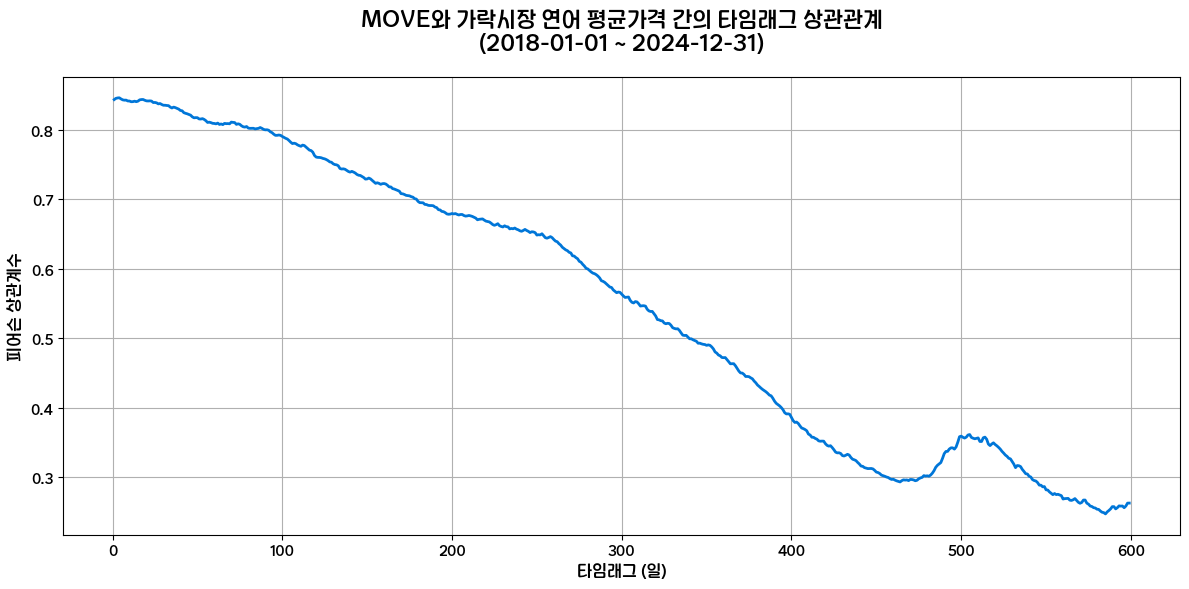

MOVE와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 4일 입니다.
최대 피어슨 상관계수: 0.8459
P-값: 0.0000e+00


In [59]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    move_lagged = df_merged['MOVE'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        move_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'MOVE와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('move_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'MOVE와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-8 연어_가락 ~ 한국은행 기준금리

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.7958  | 0.0000e+0 |

     타임래그(일)  피어슨 상관계수       P-값
0          1  0.795755  0.000000
1          2  0.795090  0.000000
2          3  0.794303  0.000000
3          4  0.793357  0.000000
4          5  0.792666  0.000000
..       ...       ...       ...
594      595 -0.019680  0.383632
595      596 -0.021593  0.339214
596      597 -0.023298  0.302573
597      598 -0.026236  0.245771
598      599 -0.028114  0.213695

[599 rows x 3 columns]


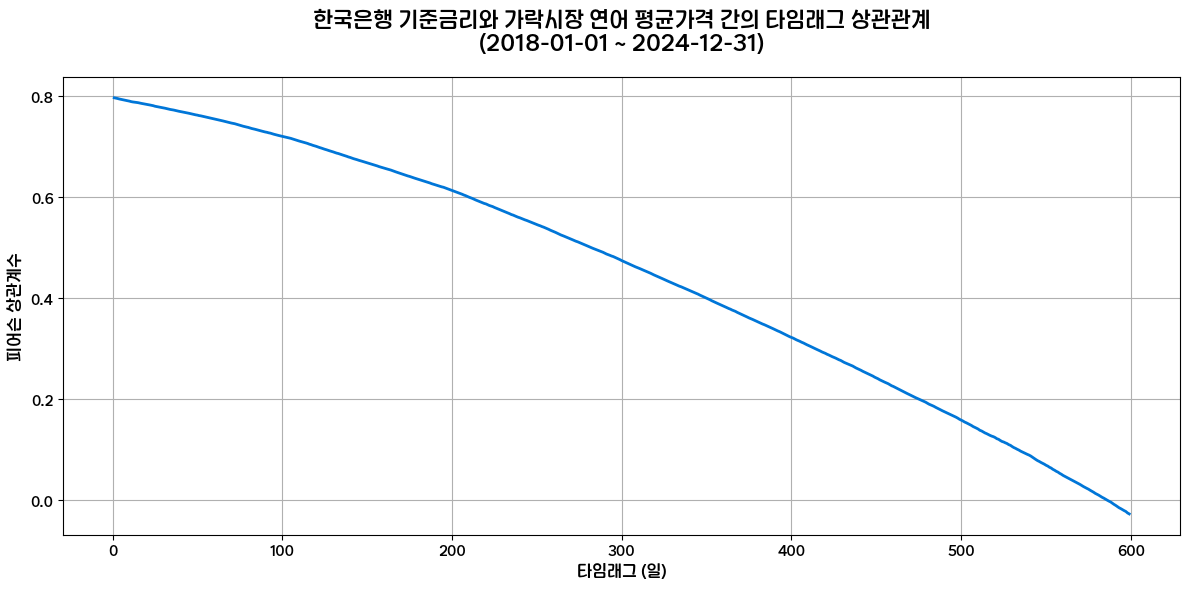

한국은행 기준금리와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.7958
P-값: 0.0000e+00


In [60]:
# 경제지표 데이터 로드
df_kr_rate = pd.read_csv('../../data/processed/d한국은행 기준금리_일자별.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_kr_rate, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    kr_rate_lagged = df_merged['한국은행_기준금리'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        kr_rate_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'한국은행 기준금리와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('kr_rate_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'한국은행 기준금리와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-9 연어_가락 ~ 노르웨이 활연어 거래량
| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 287일 | 0.2334  | 1.8638e-29 |

     타임래그(일)  피어슨 상관계수           P-값
0          1  0.095452  1.341717e-06
1          2  0.094609  1.670344e-06
2          3  0.094804  1.597352e-06
3          4  0.094274  1.835167e-06
4          5  0.094794  1.616726e-06
..       ...       ...           ...
444      445  0.149927  4.403148e-12
445      446  0.152889  1.661711e-12
446      447  0.151702  2.502000e-12
447      448  0.154699  9.231616e-13
448      449  0.155112  8.119636e-13

[449 rows x 3 columns]


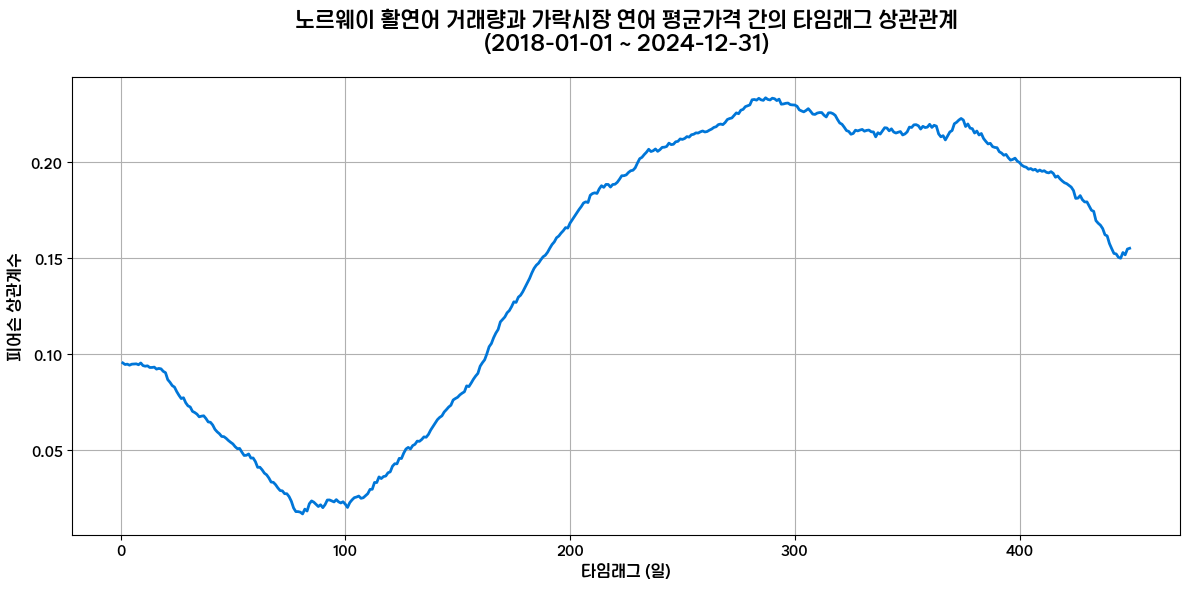

노르웨이 활연어 거래량과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 287일 입니다.
최대 피어슨 상관계수: 0.2334
P-값: 1.8638e-29


In [61]:
# 경제지표 데이터 로드
df_norsalmon = pd.read_csv('../../data/processed/d노르웨이활연어(양식)물량&가격_주별동일.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_norsalmon, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 450)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    nor_weight_lagged = df_merged['활연어_거래량(톤)'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        nor_weight_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'노르웨이 활연어 거래량과 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('nor_weight_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'노르웨이 활연어 거래량과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-10 연어_가락 ~ 노르웨이 활연어 가격

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 25일 | 0.7604  | 0.0000e+0 |


      타임래그(일)  피어슨 상관계수       P-값
0           1  0.752697  0.000000
1           2  0.753763  0.000000
2           3  0.753948  0.000000
3           4  0.753965  0.000000
4           5  0.754226  0.000000
...       ...       ...       ...
1194     1195 -0.063765  0.018641
1195     1196 -0.062541  0.021082
1196     1197 -0.062874  0.020450
1197     1198 -0.063755  0.018791
1198     1199 -0.060526  0.025773

[1199 rows x 3 columns]


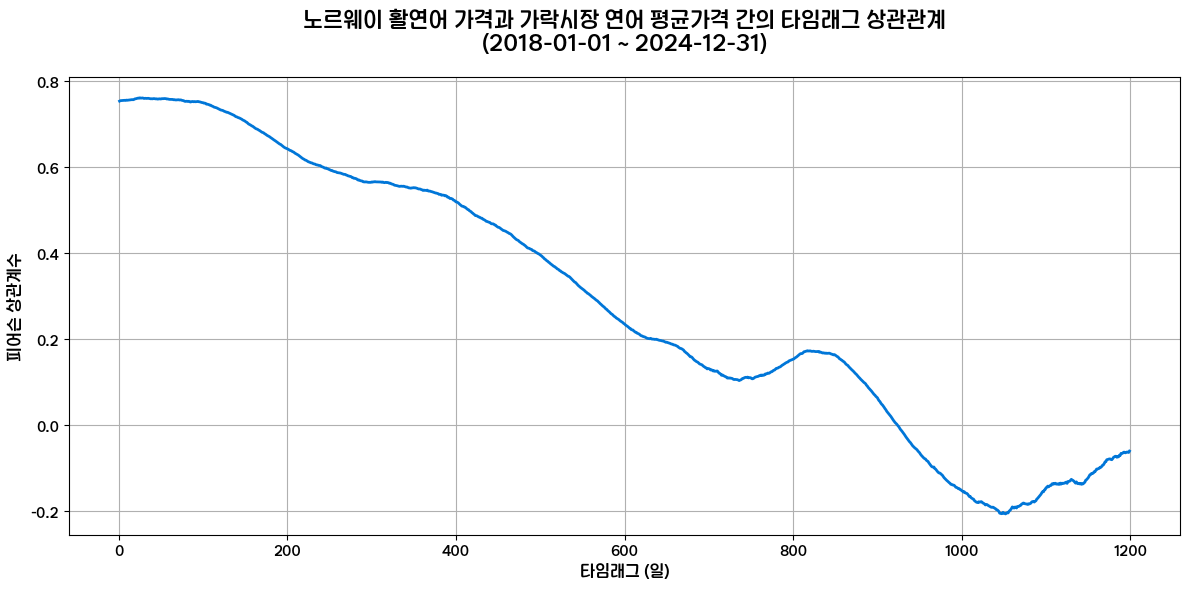

노르웨이 활연어 가격과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 25일 입니다.
최대 피어슨 상관계수: 0.7604
P-값: 0.0000e+00


In [62]:
# 경제지표 데이터 로드
df_norsalmon = pd.read_csv('../../data/processed/d노르웨이활연어(양식)물량&가격_주별동일.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_norsalmon, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1200)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    nor_price_lagged = df_merged['활연어_가격(NOK/kg)'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        nor_price_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'노르웨이 활연어 가격과 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('nor_price_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'노르웨이 활연어 가격과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

## [변화율]

* 단기 변수 변동은 가격 변동과 거의 상관이 없음. 주로 장기 추세와 연관이 있는 편


In [76]:
# CSV 파일 로드
df_rate = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 각 품목과 시장별로 그룹화하여 변화율 계산
#df_rate['priceRate'] = df_rate.groupby(['item', 'market'])['avgPrice'].pct_change()

df_rate['priceRate'] = np.log(df_rate['avgPrice']) # 사실은 자연로그임임

# 결과 확인
print(df_rate[['priceDate', 'item', 'market', 'priceRate']].head(100))

# 변경된 데이터프레임 저장
#df.to_csv('item_price_with_change.csv', index=False)

    priceDate item market  priceRate
0  2015-02-25   광어   가락시장  10.126631
1  2015-02-26   광어   가락시장  10.126631
2  2015-02-27   광어   가락시장  10.126631
3  2015-02-28   광어   가락시장  10.126631
4  2015-03-01   광어   가락시장  10.126631
..        ...  ...    ...        ...
95 2015-05-31   광어   가락시장  10.228104
96 2015-06-01   광어   가락시장  10.228104
97 2015-06-02   광어   가락시장  10.228104
98 2015-06-03   광어   가락시장  10.228104
99 2015-06-04   광어   가락시장  10.228104

[100 rows x 4 columns]


### 1-1 연어_가락 ~ KOSPI 

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 315일 | 0.6868 | 2.3383e-196 |

     타임래그(일)  피어슨 상관계수       P-값
0          1 -0.012300  0.610526
1          2 -0.007951  0.742045
2          3 -0.017745  0.462724
3          4 -0.017038  0.480859
4          5 -0.021858  0.365933
..       ...       ...       ...
594      595  0.020999  0.482063
595      596  0.019522  0.513600
596      597  0.045244  0.130046
597      598  0.035713  0.232384
598      599  0.033786  0.258798

[599 rows x 3 columns]


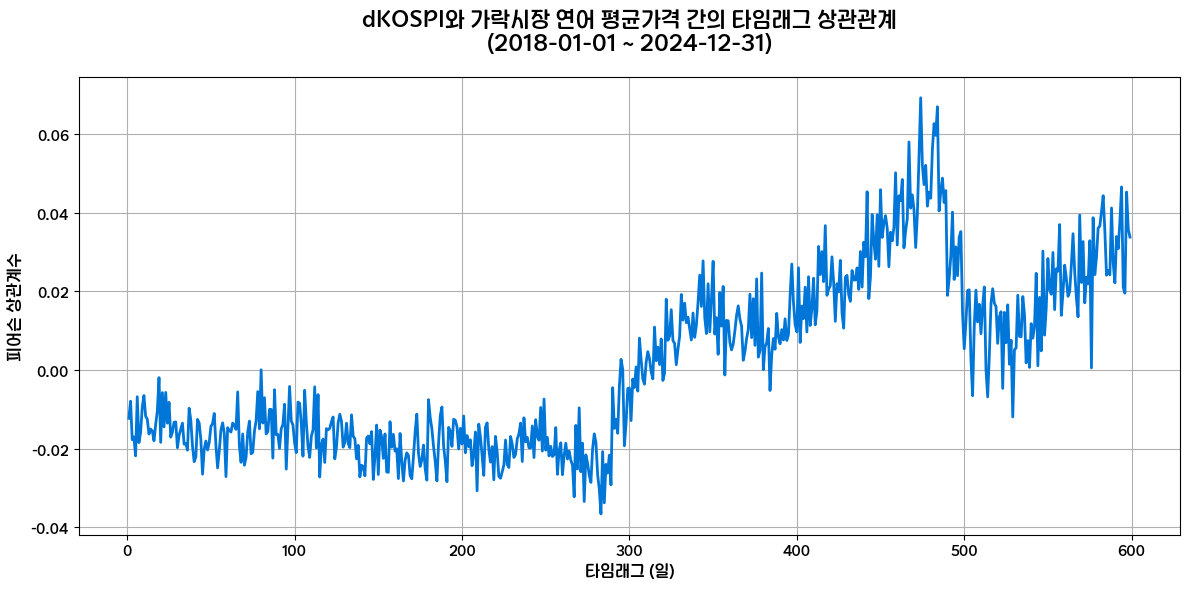

dKOSPI와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 474일 입니다.
최대 피어슨 상관계수: 0.0692
P-값: 1.4619e-02


In [77]:
# 경제지표 데이터 로드
df_kospi = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 날짜 범위 지정 
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_kospi, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dkospi_lagged = df_merged['dKOSPI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['priceRate'].iloc[lag:], 
        dkospi_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )

# 타이틀 크기 변경
plt.title(f'dKOSPI와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )

plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dkospi_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'dKOSPI와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-2 연어_가락 ~ USD/KRW

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.8383 |  0.000000e+00 |

     타임래그(일)  피어슨 상관계수       P-값
0          1  0.017381  0.471673
1          2  0.021059  0.383295
2          3  0.018354  0.447505
3          4  0.022837  0.344712
4          5  0.018841  0.435803
..       ...       ...       ...
594      595 -0.002536  0.932361
595      596 -0.036127  0.226597
596      597 -0.003976  0.894208
597      598 -0.026505  0.375510
598      599 -0.001837  0.951058

[599 rows x 3 columns]


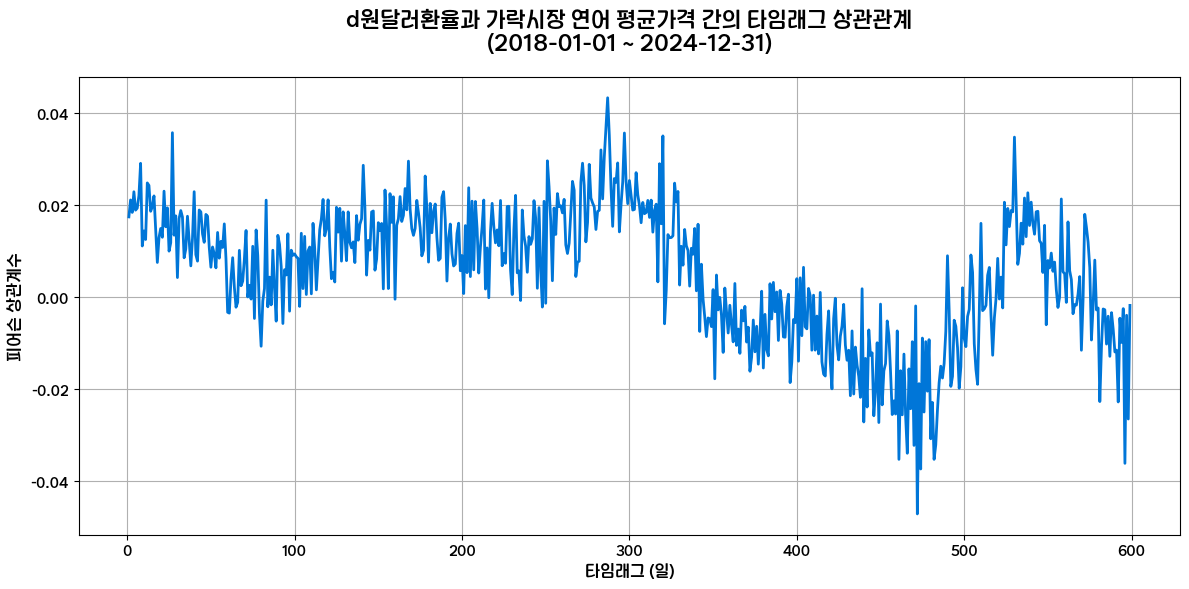

d원달러 환율과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 287일 입니다.
최대 피어슨 상관계수: 0.0432
P-값: 1.0201e-01


In [78]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dusdkrw_lagged = df_merged['dUSD/KRW'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['priceRate'].iloc[lag:], 
        dusdkrw_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'd원달러환율과 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dusdkrw_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'd원달러 환율과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-3 연어_가락 ~ VIX

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 504일 |  0.5604  |  2.5519e-101 |

      타임래그(일)  피어슨 상관계수       P-값
0           1 -0.022449  0.352554
1           2 -0.015477  0.521713
2           3 -0.018198  0.451360
3           4 -0.022082  0.360901
4           5 -0.018142  0.453015
...       ...       ...       ...
1244     1245  0.026070  0.571686
1245     1246  0.023558  0.609677
1246     1247 -0.033744  0.465025
1247     1248 -0.026782  0.562467
1248     1249 -0.003229  0.944399

[1249 rows x 3 columns]


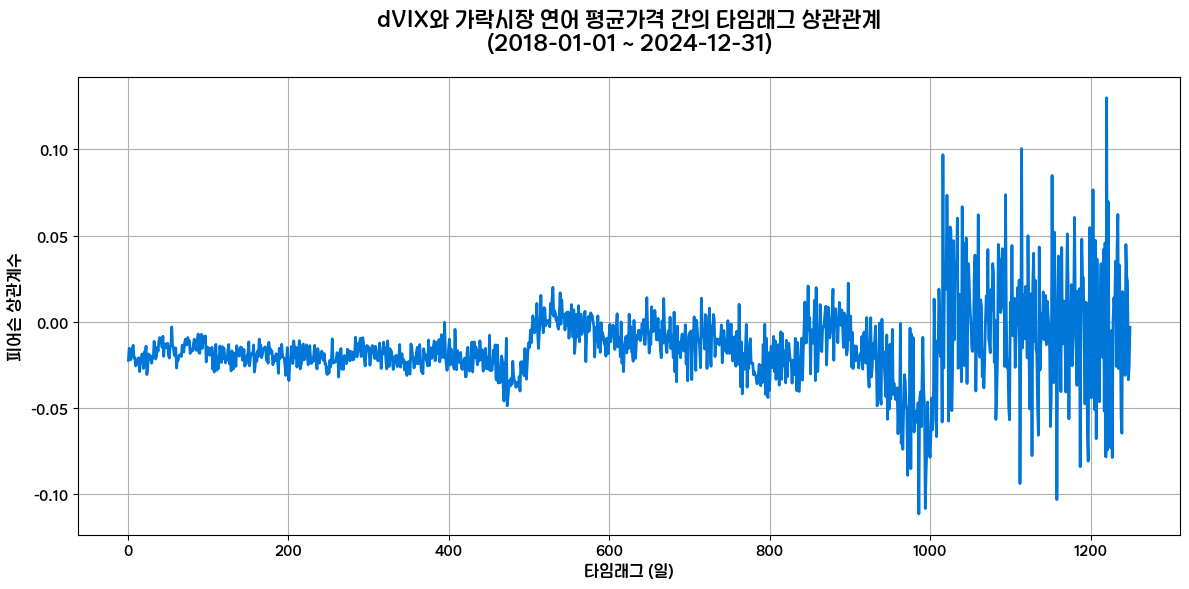

dVIX와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 1220일 입니다.
최대 피어슨 상관계수: 0.1300
P-값: 3.6527e-03


In [79]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1250)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dvix_lagged = df_merged['dVIX'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['priceRate'].iloc[lag:], 
        dvix_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'dVIX와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dvix_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'dVIX와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-4 연어_가락 ~ WTI

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 112일 |  0.7035  | 3.0350e-242 |

     타임래그(일)  피어슨 상관계수       P-값
0          1  0.013798  0.567754
1          2  0.011501  0.634017
2          3  0.013494  0.576538
3          4  0.014477  0.549212
4          5  0.015712  0.515788
..       ...       ...       ...
594      595 -0.013992  0.639497
595      596 -0.010421  0.727316
596      597 -0.008868  0.766778
597      598 -0.024625  0.410321
598      599 -0.028617  0.338867

[599 rows x 3 columns]


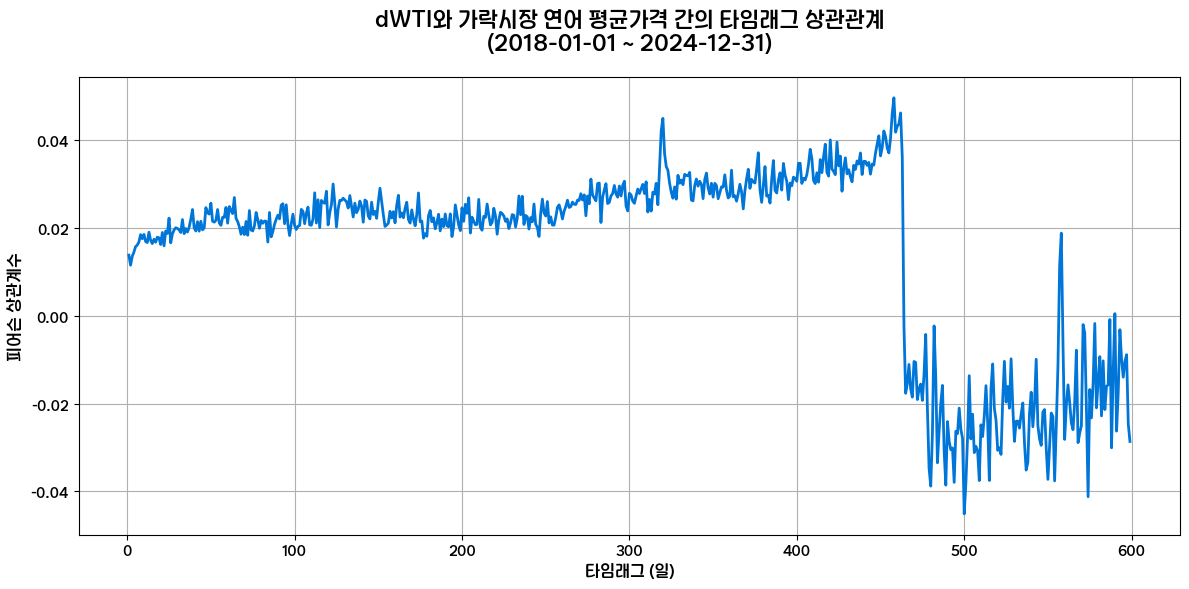

dWTI와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 458일 입니다.
최대 피어슨 상관계수: 0.0496
P-값: 7.8450e-02


In [80]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]
# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dwti_lagged = df_merged['dWTI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['priceRate'].iloc[lag:], 
        dwti_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'dWTI와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dwti_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'dWTI와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-5 연어_가락 ~ Gold

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 471일 | 0.8716  | 0.0000e+0 |

      타임래그(일)  피어슨 상관계수       P-값
0           1 -0.005520  0.819193
1           2 -0.006556  0.786101
2           3  0.010108  0.675723
3           4 -0.009319  0.699824
4           5  0.005420  0.822634
...       ...       ...       ...
1594     1595 -0.128009  0.158244
1595     1596  0.055177  0.546085
1596     1597 -0.113189  0.216411
1597     1598  0.106637  0.246363
1598     1599  0.007797  0.932926

[1599 rows x 3 columns]


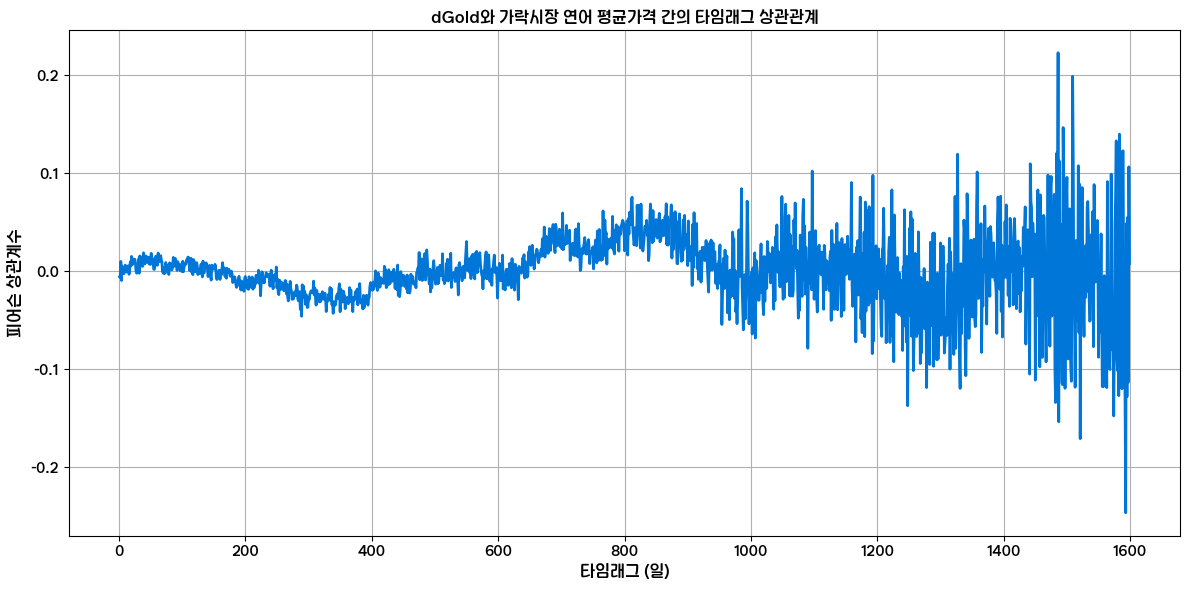

dGold와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 1486일 입니다.
최대 피어슨 상관계수: 0.2231
P-값: 6.1967e-04


In [81]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dgold_lagged = df_merged['dGold'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['priceRate'].iloc[lag:], 
        dgold_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'dGold와 가락시장 연어 평균가격 간의 타임래그 상관관계')
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dgold_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'dGold와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-6 연어_가락 ~ Silver

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 397일 | 0.8541  | 0.0000e+0 |


      타임래그(일)  피어슨 상관계수       P-값
0           1  0.007797  0.577778
1           2  0.007797  0.691652
2           3  0.007797  0.916260
3           4  0.007797  0.660870
4           5  0.007797  0.789394
...       ...       ...       ...
1594     1595  0.007797  0.174833
1595     1596  0.007797  0.160623
1596     1597  0.007797  0.321667
1597     1598  0.007797  0.060398
1598     1599  0.007797  0.385592

[1599 rows x 3 columns]


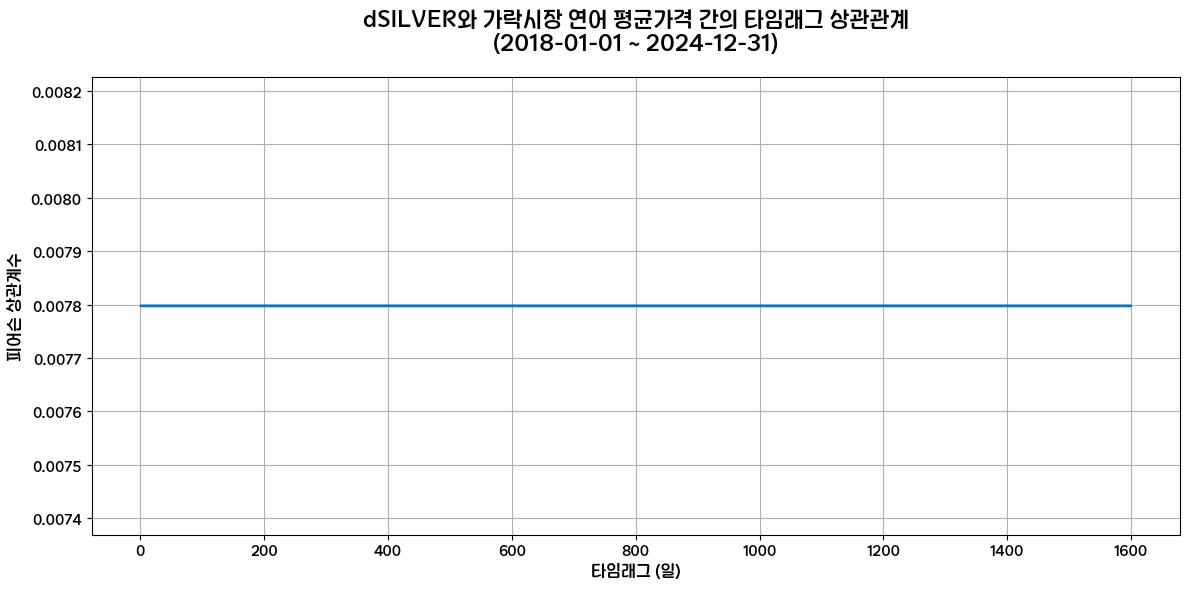

dSILVER와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.0078
P-값: 5.7778e-01


In [82]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dsilver_lagged = df_merged['dSilver'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    dcorrelation, p_value = stats.pearsonr(
        df_merged['priceRate'].iloc[lag:], 
        dsilver_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'dSILVER와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dsilver_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'dSILVER와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-7 연어_가락 ~ MOVE

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 4일 | 0.8459  | 0.0000e+0 |


     타임래그(일)  피어슨 상관계수       P-값
0          1 -0.013721  0.569929
1          2 -0.009806  0.684810
2          3 -0.008514  0.724576
3          4  0.002205  0.927318
4          5  0.000162  0.994651
..       ...       ...       ...
594      595  0.008521  0.775471
595      596 -0.006737  0.821663
596      597 -0.016415  0.582993
597      598  0.009658  0.746810
598      599 -0.004795  0.872708

[599 rows x 3 columns]


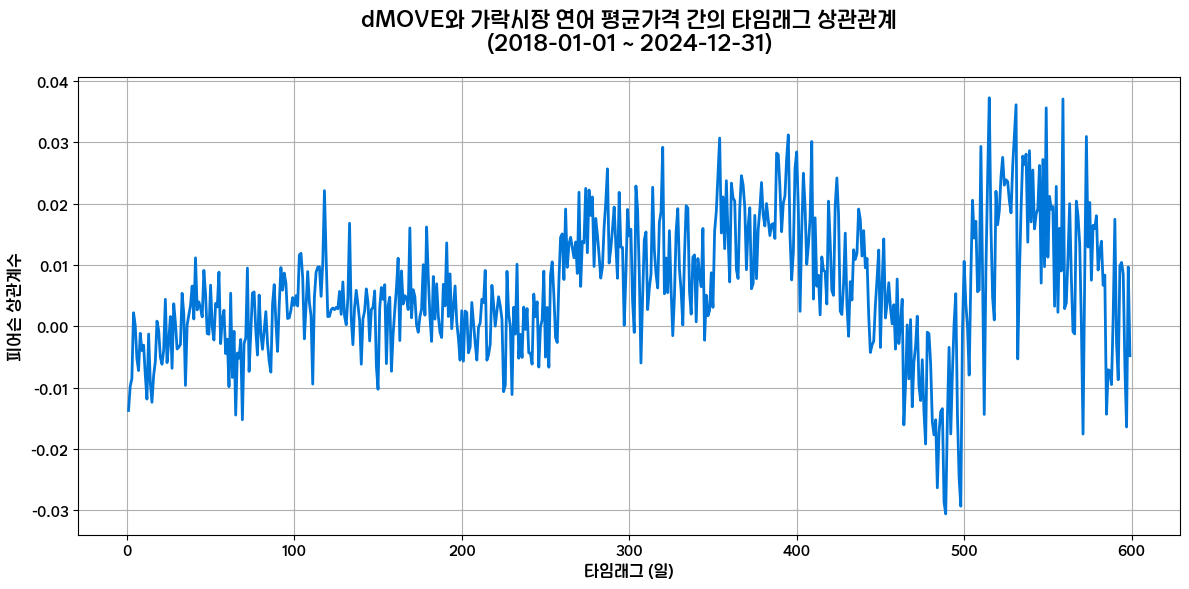

dMOVE와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 515일 입니다.
최대 피어슨 상관계수: 0.0372
P-값: 1.9672e-01


In [83]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dmove_lagged = df_merged['dMOVE'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['priceRate'].iloc[lag:], 
        dmove_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'dMOVE와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dmove_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'dMOVE와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-8 연어_가락 ~ 한국은행 기준금리

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.7958  | 0.0000e+0 |

     타임래그(일)  피어슨 상관계수       P-값
0          1  0.025015  0.206144
1          2  0.027905  0.158513
2          3  0.032724  0.098243
3          4  0.027862  0.159312
4          5  0.027378  0.166769
..       ...       ...       ...
594      595  0.060359  0.007488
595      596  0.053305  0.018242
596      597  0.076595  0.000689
597      598  0.063785  0.004739
598      599  0.064491  0.004306

[599 rows x 3 columns]


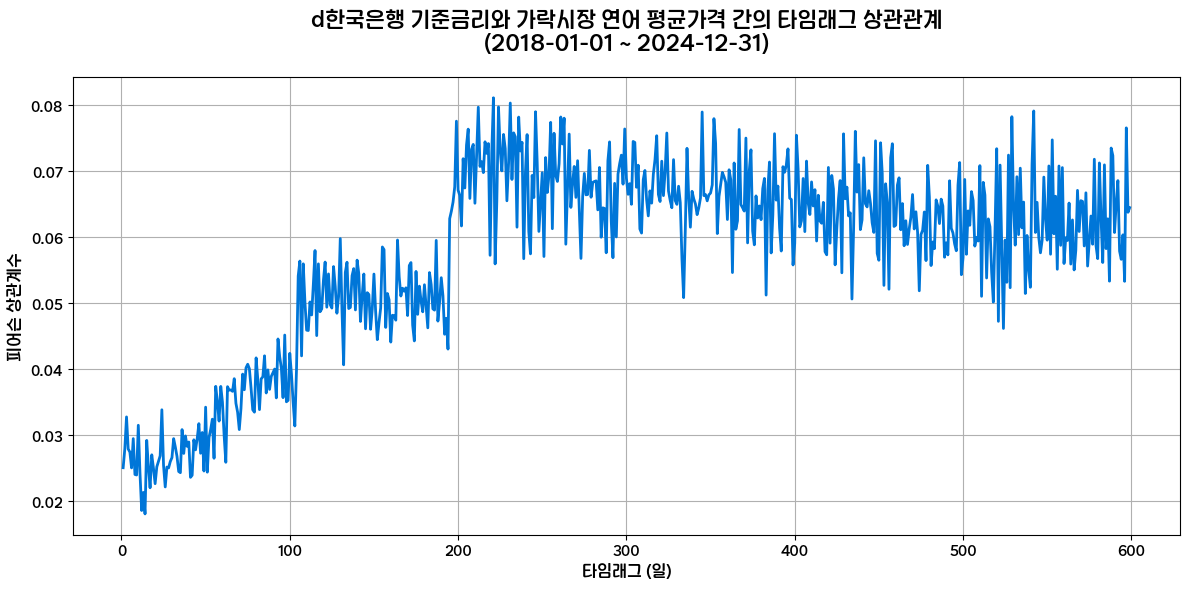

d한국은행 기준금리와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 221일 입니다.
최대 피어슨 상관계수: 0.0812
P-값: 8.5977e-05


In [84]:
# 경제지표 데이터 로드
df_kr_rate = pd.read_csv('../../data/processed/d한국은행 기준금리_일자별.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_kr_rate, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dkr_rate_lagged = df_merged['d한국은행_기준금리'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['priceRate'].iloc[lag:], 
        dkr_rate_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'd한국은행 기준금리와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dkr_rate_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'd한국은행 기준금리와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-9 연어_가락 ~ 노르웨이 활연어 거래량
| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 287일 | 0.2334  | 1.8638e-29 |

     타임래그(일)  피어슨 상관계수       P-값
0          1  0.002958  0.881183
1          2 -0.005102  0.796639
2          3 -0.000167  0.993270
3          4 -0.003439  0.862155
4          5  0.000232  0.990656
..       ...       ...       ...
444      445 -0.016701  0.443126
445      446 -0.000693  0.974609
446      447 -0.017128  0.431778
447      448 -0.006934  0.750356
448      449 -0.010691  0.623808

[449 rows x 3 columns]


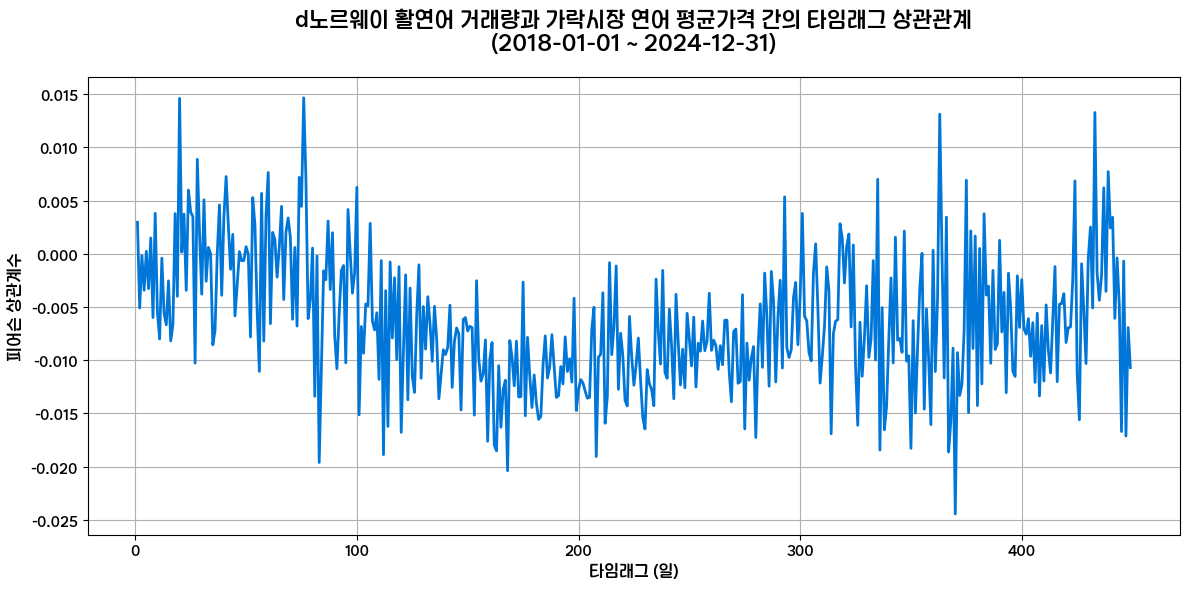

d노르웨이 활연어 거래량과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 76일 입니다.
최대 피어슨 상관계수: 0.0147
P-값: 4.6577e-01


In [85]:
# 경제지표 데이터 로드
df_norsalmon = pd.read_csv('../../data/processed/d노르웨이활연어(양식)물량&가격_주별동일.csv', parse_dates=['날짜'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_norsalmon, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 450)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dnor_weight_lagged = df_merged['d활연어_거래량(톤)'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        dnor_weight_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'd노르웨이 활연어 거래량과 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dnor_weight_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'd노르웨이 활연어 거래량과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-10 연어_가락 ~ 노르웨이 활연어 가격

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 25일 | 0.7604  | 0.0000e+0 |


      타임래그(일)  피어슨 상관계수       P-값
0           1  0.001181  0.952439
1           2  0.003819  0.847013
2           3  0.003232  0.870328
3           4  0.001421  0.942803
4           5  0.003731  0.850610
...       ...       ...       ...
1194     1195 -0.005828  0.829914
1195     1196  0.001217  0.964237
1196     1197  0.004464  0.869414
1197     1198 -0.018634  0.492639
1198     1199 -0.001985  0.941757

[1199 rows x 3 columns]


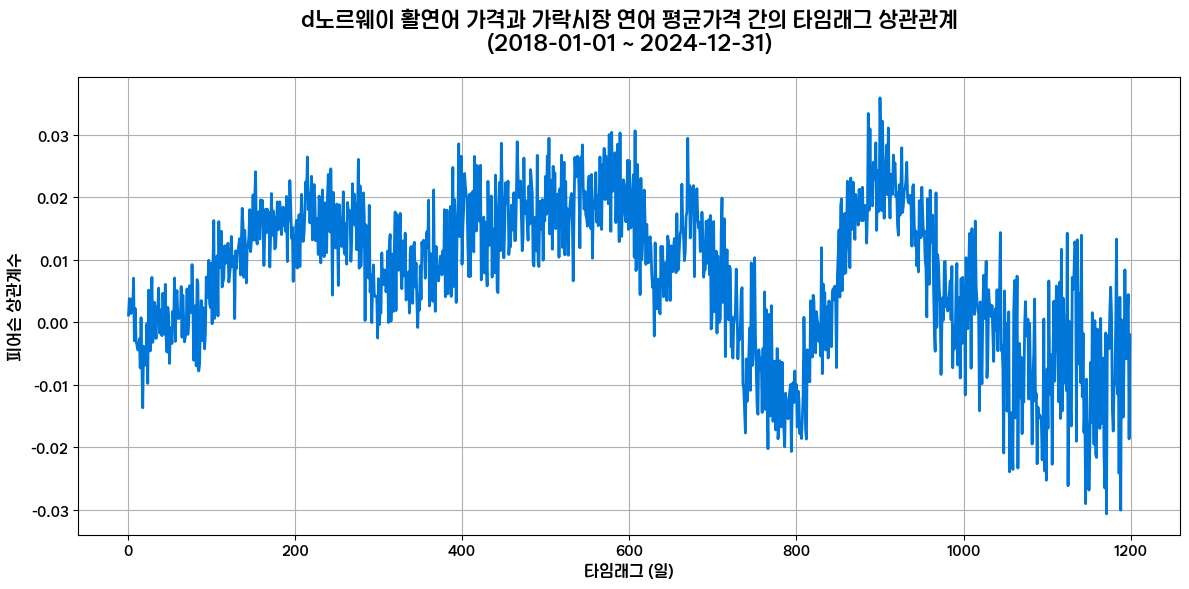

노르웨이 활연어 가격과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 900일 입니다.
d최대 피어슨 상관계수: 0.0359
P-값: 1.4373e-01


In [86]:
# 경제지표 데이터 로드
df_norsalmon = pd.read_csv('../../data/processed/d노르웨이활연어(양식)물량&가격_주별동일.csv', parse_dates=['날짜'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_rate[
    (df_rate['item'] == '연어') & 
    (df_rate['market'] == '가락시장') &
	(df_rate['priceDate'] >= start_date) &
    (df_rate['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_norsalmon, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1200)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    dnor_price_lagged = df_merged['d활연어_가격(NOK/kg)'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['priceRate'].iloc[lag:], 
        dnor_price_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'd노르웨이 활연어 가격과 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('dnor_price_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'노르웨이 활연어 가격과 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'd최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')